목적 : APPLE의 주식 시세 예측

시계열(Time Series) 생성

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

print('슝=3')

슝=3


In [2]:
# 데이터 불러오기
dataset_filepath = '/content/drive/MyDrive/AIFFEL/[E-04]/data_sets/APPLE.csv'
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-26,148.270004,149.830002,147.699997,148.990005,148.143631,72434100
1,2021-07-27,149.119995,149.210007,145.550003,146.770004,145.936234,104818600
2,2021-07-28,144.809998,146.970001,142.539993,144.979996,144.156403,118931200
3,2021-07-29,144.690002,146.550003,144.580002,145.639999,144.812653,56699500
4,2021-07-30,144.380005,146.330002,144.110001,145.860001,145.031403,70440600


In [3]:
# DataFrame에서 Date 컬럼을 index로 삼아 시계열을 생성
## Date를 index_col로 지정. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-26,148.270004,149.830002,147.699997,148.990005,148.143631,72434100
2021-07-27,149.119995,149.210007,145.550003,146.770004,145.936234,104818600
2021-07-28,144.809998,146.970001,142.539993,144.979996,144.156403,118931200
2021-07-29,144.690002,146.550003,144.580002,145.639999,144.812653,56699500
2021-07-30,144.380005,146.330002,144.110001,145.860001,145.031403,70440600


In [4]:
ts1 = df['Close']  # 우선은 데이터 확인용이니 time series 의 이니셜을 따서 'ts'라고 이름 붙여줍시다!
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
2021-07-26    148.990005
2021-07-27    146.770004
2021-07-28    144.979996
2021-07-29    145.639999
2021-07-30    145.860001
Name: Close, dtype: float64

시계열 안정성의 정성적 분석

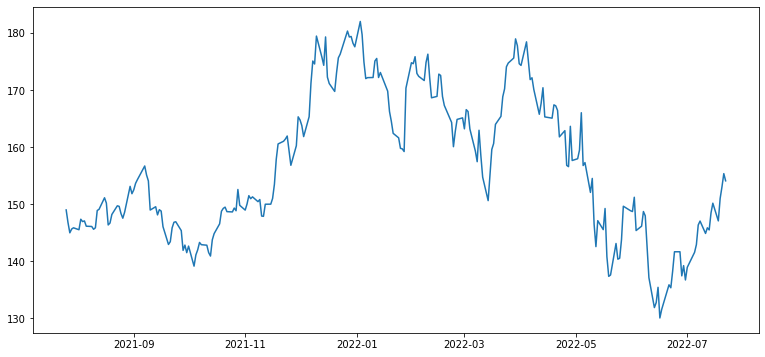

In [5]:
# 시각화를 통해 안정성(Stationarity) 여부를 확인
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [6]:
# 결측치 유무 확인
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

In [7]:
# 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


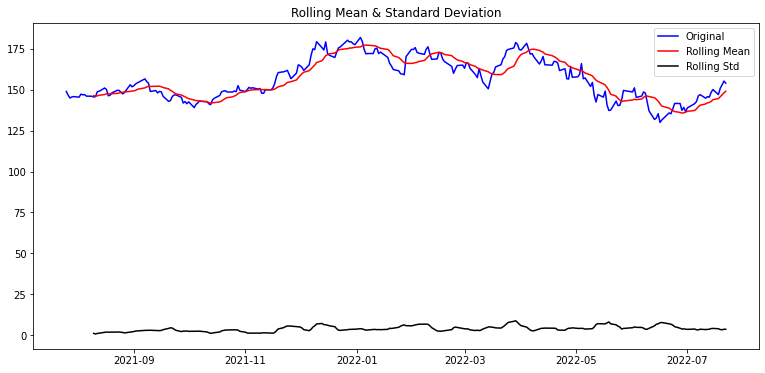

In [8]:
plot_rolling_statistics(ts1, window=12)

In [9]:
# Augmented Dickey-Fuller Test(ADF Test) 를 사용해 시계열 데이터의 안정성(stationary)을 테스트
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [10]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.905607
p-value                          0.329428
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


p-value가 0.329428이 나옴. 0에 가깝다면 가깝지만 그렇게 가깝지는 않은듯.

보다 Stationary한 시계열로 가공해 가기

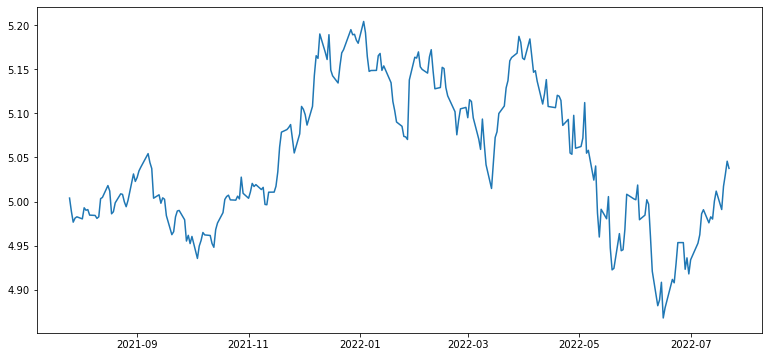

In [11]:
# 로그함수 변환
ts_log = np.log(ts1)
plt.plot(ts_log)

In [12]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.911841
p-value                          0.326512
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


p-value가 엄청 내려가진 않은듯..

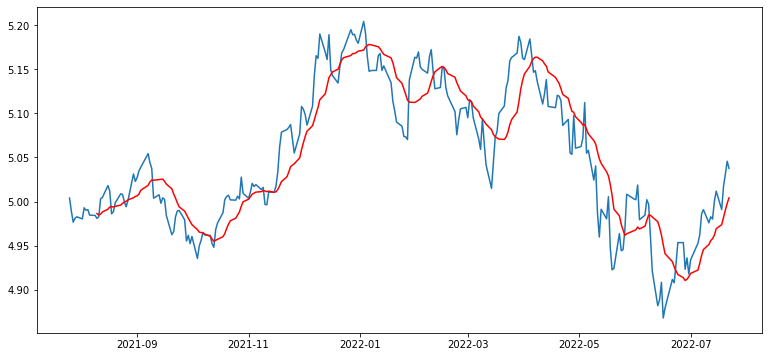

In [13]:
# Moving average 제거 - 추세(Trend) 상쇄하기
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [14]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Date
2021-07-26         NaN
2021-07-27         NaN
2021-07-28         NaN
2021-07-29         NaN
2021-07-30         NaN
2021-08-02         NaN
2021-08-03         NaN
2021-08-04         NaN
2021-08-05         NaN
2021-08-06         NaN
2021-08-09         NaN
2021-08-10   -0.005545
2021-08-11   -0.001992
2021-08-12    0.017373
2021-08-13    0.016448
Name: Close, dtype: float64

In [15]:
# 앞선 11개의 데이터가 결측치로 계산되지 않음. 결측치 제거.
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2021-08-10   -0.005545
2021-08-11   -0.001992
2021-08-12    0.017373
2021-08-13    0.016448
2021-08-16    0.026827
2021-08-17    0.018216
2021-08-18   -0.008096
2021-08-19   -0.005401
2021-08-20    0.004004
2021-08-23    0.012721
2021-08-24    0.010158
2021-08-25    0.000416
2021-08-26   -0.006229
2021-08-27   -0.000621
2021-08-30    0.027008
Name: Close, dtype: float64

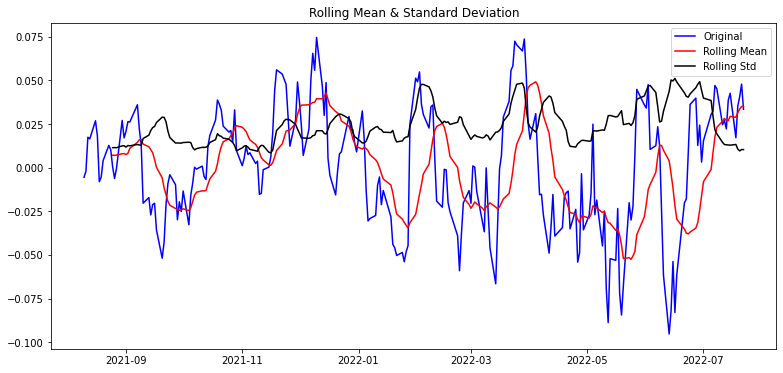

In [16]:
# ts_log_moving_avg를 정성, 정량적으로 분석
plot_rolling_statistics(ts_log_moving_avg)

In [17]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.495475
p-value                          0.000200
#Lags Used                       1.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64


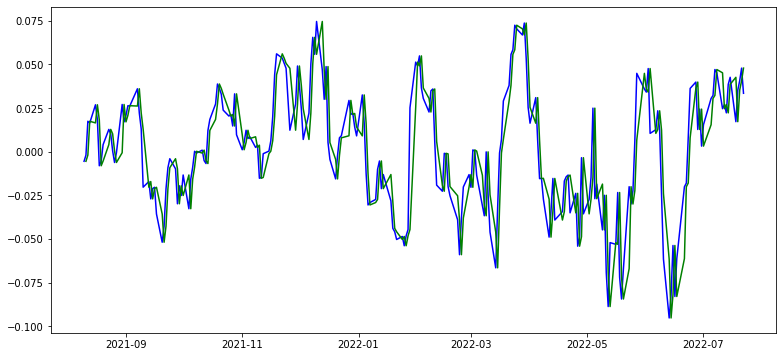

In [18]:
# 차분(Differencing) - 계절성(Seasonality) 상쇄하기
## 시프트한 시계열과 원본 시계열에 대한 그래프
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

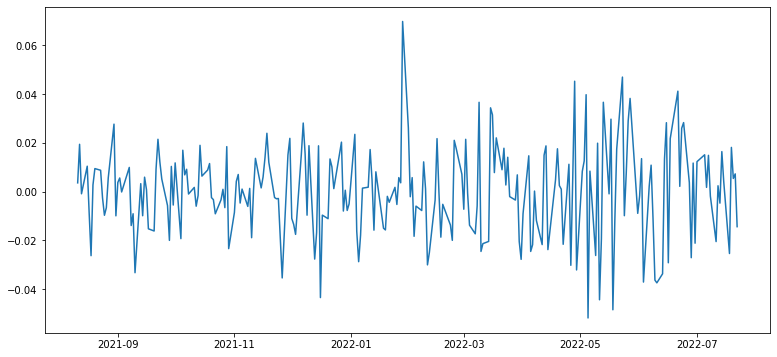

In [19]:
# 원본 시계열에서 시프트한 시계열을 뺀 값을 그래프로 표현
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

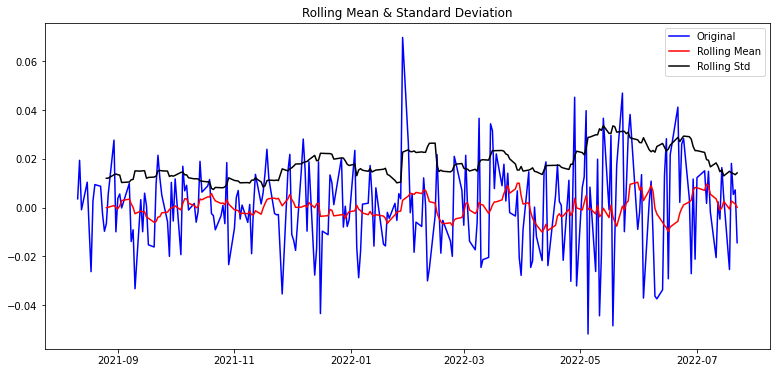

In [20]:
# 이동평균과, 이동표준편차를 그래프에 나타내어 정성적으로 안정성(stationary) 여부를 파악
plot_rolling_statistics(ts_log_moving_avg_diff)

In [21]:
# 차분의 효과가 어떠했는지 알아보기 위해 Augmented Dickey-Fuller Test를 수행
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -7.417842e+00
p-value                        6.860155e-11
#Lags Used                     9.000000e+00
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


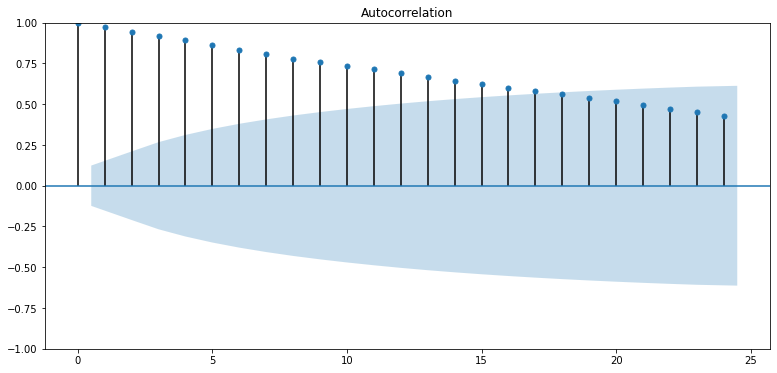

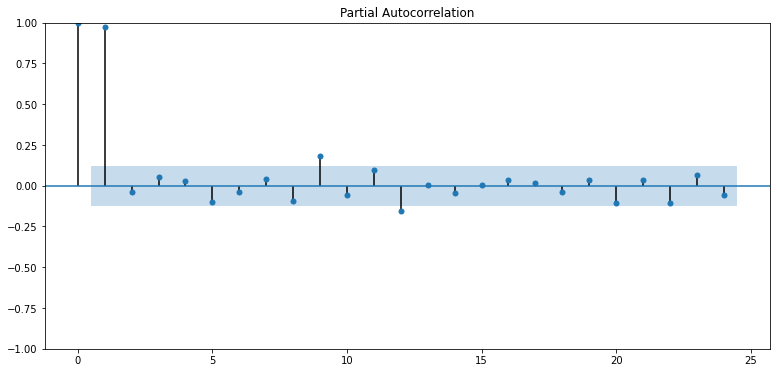

In [22]:
# ACF와 PACF 플로팅 기능을 사용
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

ACF : p = 17,18정도가 적당해보임.

PACF : q = 1이 적당해보임.

Results of Dickey-Fuller Test:
Test Statistic                -1.551601e+01
p-value                        2.315852e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


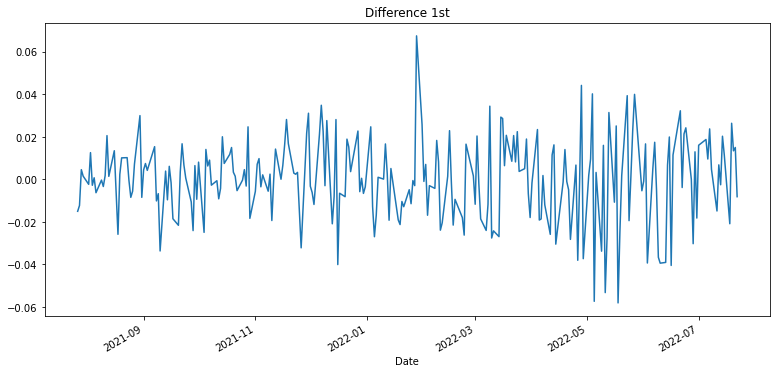

In [23]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                -8.052288e+00
p-value                        1.729112e-12
#Lags Used                     1.100000e+01
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


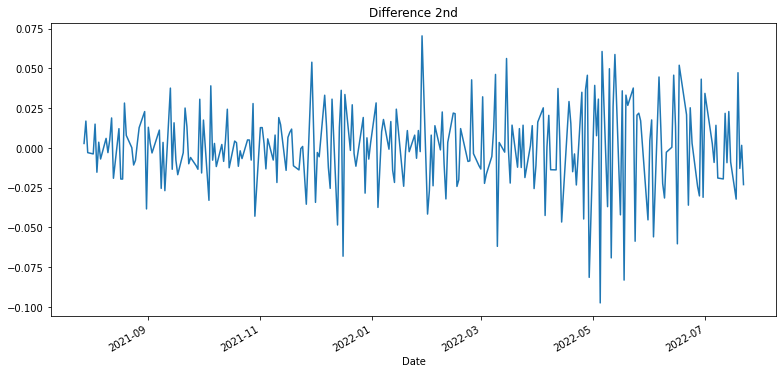

In [24]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

d는 1차와 2차 둘 다 해보는 것도 나쁘지않아보임.

학습 데이터 분리

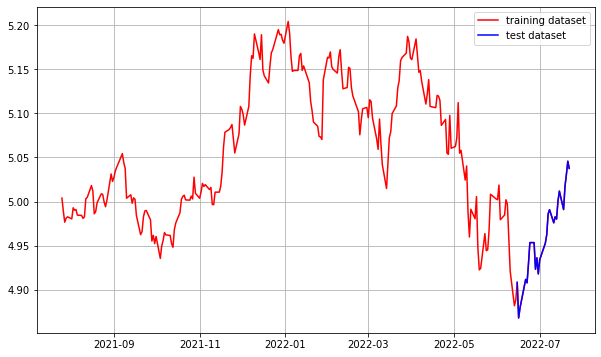

In [25]:
# 시계열 데이터에서 학습 데이터와 테스트 데이터를 분리
## 분리 비율은 학습과 테스트에 9:1
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [26]:
# 데이터셋의 형태를 확인
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2021-07-26    5.003879
2021-07-27    4.988867
Name: Close, dtype: float64
(225,)
(26,)


ARIMA 모델 훈련과 추론

In [27]:
# satasmodels의 버전 문제로 밑의 코드에서 오류가 뜸.
## 업데이트
!pip install --upgrade statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
# ARIMA 모델을 훈련
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(18, 1, 2)) # 모수는 이전 그래프를 참고 
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                ARIMA(18, 1, 2)   Log Likelihood                 582.791
Date:                Tue, 26 Jul 2022   AIC                          -1123.583
Time:                        14:57:05   BIC                          -1051.938
Sample:                             0   HQIC                         -1094.663
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1172      1.007     -0.116      0.907      -2.090       1.856
ar.L2          0.2818      0.805      0.350      0.726      -1.296       1.860
ar.L3         -0.1049      0.084     -1.256      0.2

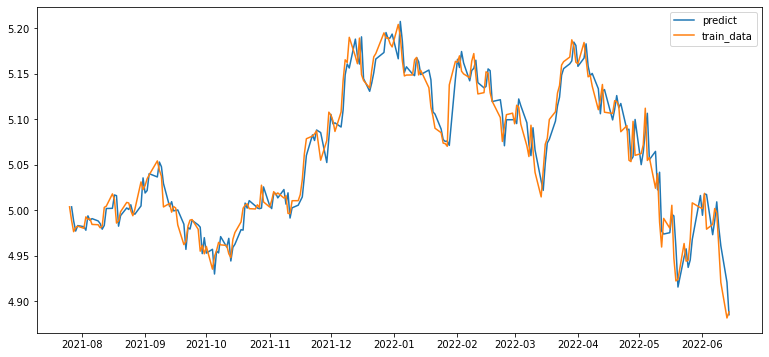

In [29]:
# ARIMA 모델이 훈련 결과를 시각적으로 확인
fitted_m = fitted_m.predict()
fitted_m = fitted_m.drop(fitted_m.index[0])
plt.plot(fitted_m, label='predict')
plt.plot(train_data, label='train_data')
plt.legend()

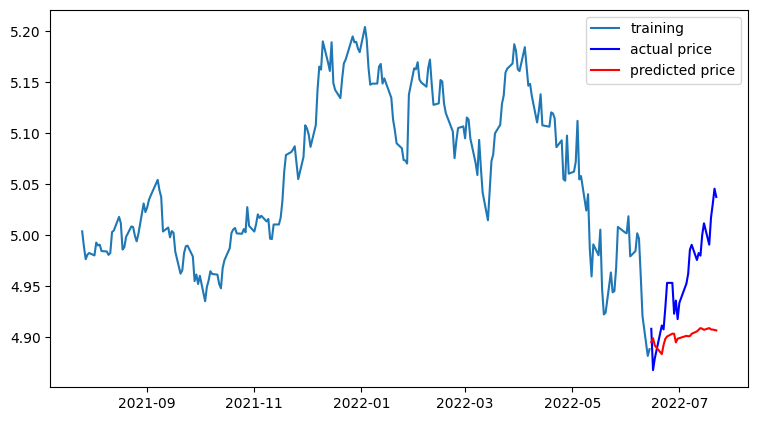

In [30]:
# forecast() 메소드를 이용해 테스트 데이터 구간의 데이터를 예측
model = ARIMA(train_data, order=(18, 1, 2)) 
fitted_m = model.fit() 
fc= fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [31]:
# MSE, MAE, RMSE, MAPE를 계산
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  107.20926701043024
MAE:  8.80497095150866
RMSE:  10.354190794573482
MAPE: 6.00%


- 진행과정
 - 처음엔 이해가 잘 안되서 LMS노드 그대로 따라함.
 - 과정 이해를 위해 안정적이지 않은 시계열데이터를 안정적인 시계열로 바꾸는 방법 중 기존의 시계열 데이터를 가공/변형하는 방법 선택.
 - 로그 변환, MA 제거, 차분을 하면서 p-value가 내려가는 것을 확인.
 - p, q, d값을 구하기 위해 ACF, PACF, 1,2차 차분 진행.
 - 처음엔 p, q, d값이 어떻게 정해지는 지 몰라서 노드를 똑같이 따라하다보니 에러 발생.
 - 차분이 안맞아서 에러가 발생함.
 - APPLE 데이터의 맞게 찾은 차분을 사용.
 - 훈련 결과 시각화에서 predict data와 train data가 전혀 다르게 나옴.
 - statsmodels의 버전 문제 -> 업데이트
 - 훈련 결과가 제대로 나옴. -> (14, 1, 2)로 시도.
 - MAPE = 6.15%
 - 이제 위에서 찾은 p, q, d값을 제대로 넣어서 실험.
 - (17, 1, 1) -> MAPE = 6.11%
 - (17, 1, 2) -> MAPE = 6.11%
 - (18, 1, 1) -> MAPE = 6.18%
 - (18, 1, 2) -> MAPE = 6.00%
 - (18, 1, 2)를 사용했을 때 가장 낮게 나옴.


- 회고
 - 너무 어려워서 노드를 따라만해도 힘들었음.
 - 그래도 진행하면서 좀 이해가 됨.
 - 이해를 위해서 시계열 데이터를 가공/변형하는 방법을 선택했지만 다음에는 그냥 분해하는 방법 사용할듯.
 - 중간에 에러가 너무 많이 떠서 에러 고치는게 힘들었음.
 - p, q, d값을 구하는 방법이 노드상에 자세히 나오지 않아서 힘들었음.